<a href="https://colab.research.google.com/github/DegaZZZ/CTR-Python-experiments/blob/main/ctr-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Project in predicting CTR using Machine Learning
#Dataset is taken from Kaggle: https://www.kaggle.com/datasets/louischen7/2020-digix-advertisement-ctr-prediction
#Author: Platon Makinen
#Date: 03.04.2022

#Importing all the necessary libraries
#Numpy is used for mathematical operations
#Pandas is used for data manipulation
#Matplotlib is used for plotting
#Seaborn is used for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [94]:
#Lets read the data
CTRdata = pd.read_csv('/content/Ad_click_prediction_train (1).csv')
CTRdata['gender'] = CTRdata['gender'].fillna('Other')

In [95]:
CTRdata.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


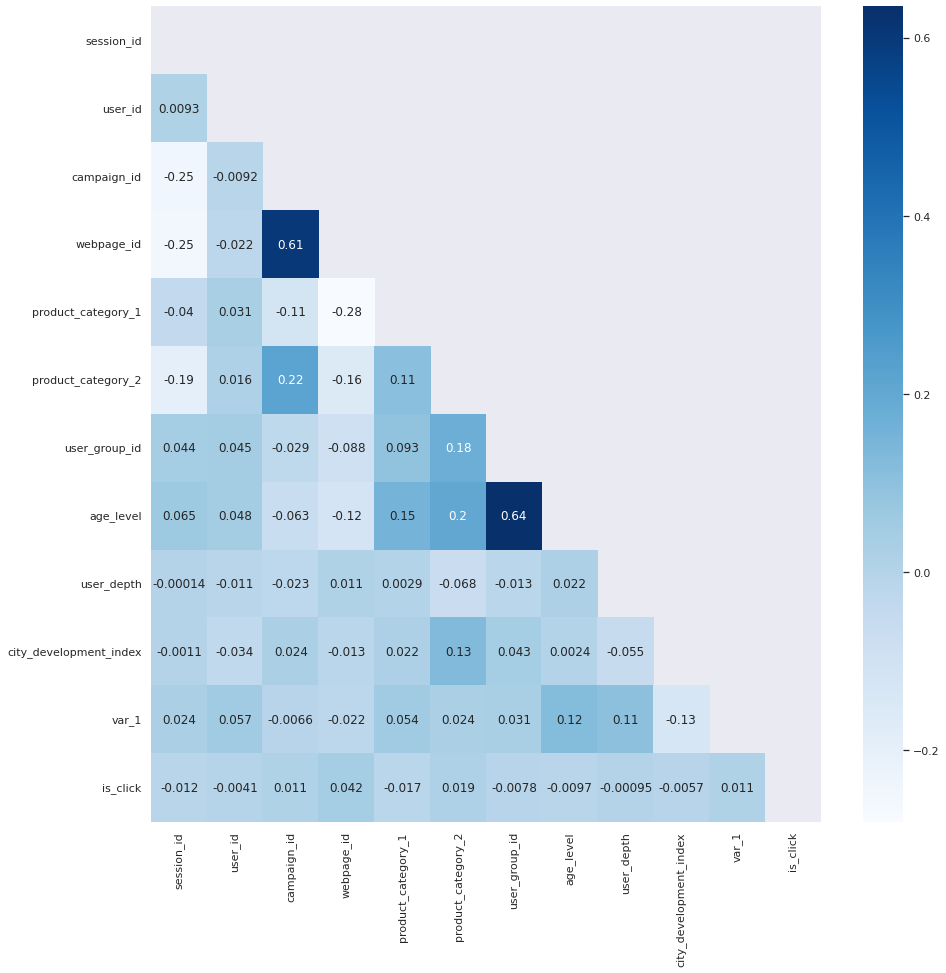

In [57]:
#Let's see most important features in the data using correlation matrix
cm = CTRdata.corr()
plt.figure(figsize=(15, 15))
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
corr_heatmap=sns.heatmap(cm, cmap="Blues", annot=True, mask=mask)

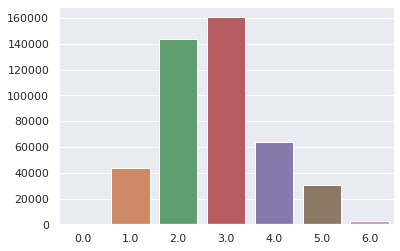

In [60]:
#Here we can see distribution of age_level in given data
age = Counter(age for age in CTRdata['age_level'])
x_age_plot = [x[:][0] for x in sorted(age.items())]
y_age_plot = [y[:][1] for y in sorted(age.items())]
sns.barplot(x=x_age_plot, y=y_age_plot)

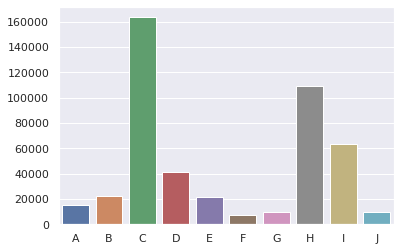

In [61]:
#We can easily notice that age groups 2.0 and 3.0 are the biggest. Third by size is age_level = 4.0.
#Now, let's plot the distribution of products available
prod = Counter(prod for prod in CTRdata['product'])
x_product_plot = [x[:][0] for x in sorted(prod.items())]
y_product_plot = [y[:][1] for y in sorted(prod.items())]
sns.barplot(x=x_product_plot, y=y_product_plot)

In [ ]:
#Products C, H, and I appear most frequently in dataset
#On the other hand, products G, J, and F appear much less frequently

In [92]:
#Let's inspect city_development_index distribution of each gender of those who clicked

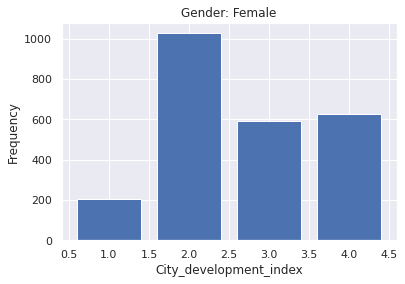

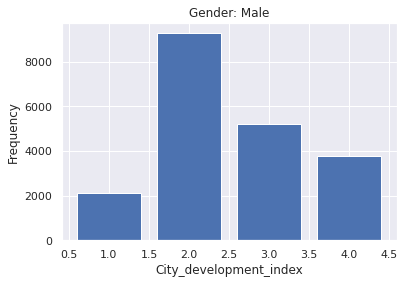

In [139]:
product_gender_CTRdata = CTRdata[CTRdata['is_click'] == 1][['gender', 'city_development_index']].dropna()
product_gender_CTRdata = product_gender_CTRdata[product_gender_CTRdata['gender'] != 'Other']
for gender in product_gender_CTRdata['gender'].unique():
  tempCTRdata = product_gender_CTRdata[product_gender_CTRdata['gender'] == gender]
  productCount = Counter(product for product in tempCTRdata['city_development_index'])
  x_product_plot = [x[:][0] for x in sorted(productCount.items())]
  y_product_plot = [y[:][1] for y in sorted(productCount.items())]
  plt.bar(x_product_plot, y_product_plot)
  plt.title('Gender: ' + str(gender))
  plt.xlabel('City_development_index')
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
#From these plots we can notice that City_development_index of 4.0 appears much more frequenly in a Female part of population that clicked the AD